In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np 
from sklearn import manifold
from time import time

In [2]:
data = pd.read_csv('data/ml_requests.csv')
data.head()

,id_creator,dateopen,dateclose,num,lat,lng,items
0,1005,2016-05-04 15:44:05.723124,2016-05-05 14:15:55.553433,125-001,55.725891,37.606964,"2,46,49"
1,1000,2016-05-04 15:44:14.244274,2016-05-04 15:56:39.212531,125-002,55.733261,37.439720,2
2,1000,2016-05-04 15:44:20.661393,2016-05-04 15:56:28.868969,125-003,55.733261,37.439720,2
3,1000,2016-05-04 15:44:30.97105,2016-05-04 15:56:22.931567,125-004,55.733261,37.439720,2
4,1000,2016-05-04 15:44:35.584794,2016-05-04 15:56:04.885039,125-005,55.733261,37.439720,2


In [3]:
items = data['items'].str.split(',')
features_names = set().union(*items)
features = pd.DataFrame(index=items.index, columns=features_names)

for i in items.index:
    features.iloc[i] = dict.fromkeys(items.iloc[i], 1)

features.fillna(0, inplace=True)
features = features.reindex_axis(sorted(features.columns), axis=1)
features.head()

,10,100,10001,10002,10003,10004,10005,10006,10007,10008,...,90,91,92,93,94,95,96,97,98,99
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


MDS: 1.3 sec


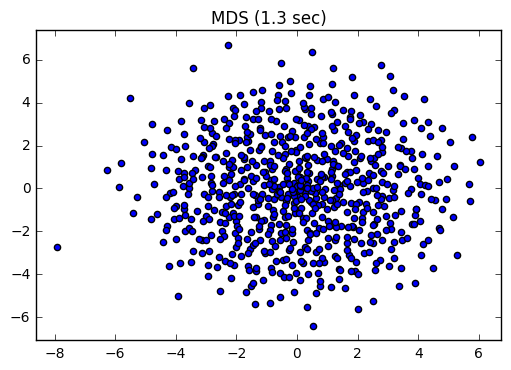

In [7]:
X = features
n_components=2

t0 = time()
mds = manifold.MDS(n_components, max_iter=100, n_init=1)
Y = mds.fit_transform(X)
t1 = time()
print("MDS: %.2g sec" % (t1 - t0))
plt.scatter(Y[:, 0], Y[:, 1])
plt.title("MDS (%.2g sec)" % (t1 - t0))
plt.axis('tight')
plt.show()

t-SNE: 3.9 sec


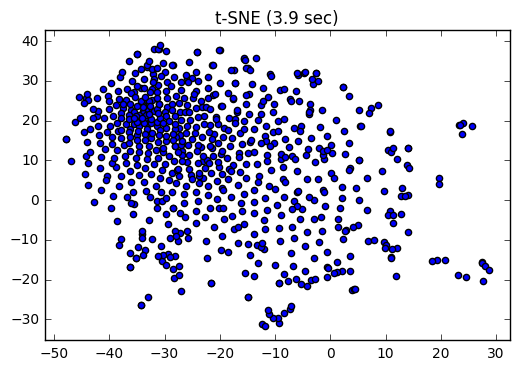

In [8]:
t0 = time()
tsne = manifold.TSNE(n_components=n_components, init='pca', random_state=0)
Y = tsne.fit_transform(X)
t1 = time()
print("t-SNE: %.2g sec" % (t1 - t0))
plt.scatter(Y[:, 0], Y[:, 1])
plt.title("t-SNE (%.2g sec)" % (t1 - t0))
plt.axis('tight')
plt.show()